# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
Model=RandomForestClassifier()

# Original Data

In [3]:
weekly_DMC=pd.read_csv("weekly_DMC.csv")
weekly_DMC.set_index(["DATE"],inplace=True)

In [4]:
y=weekly_DMC.pop("Drought_Level")
x=weekly_DMC[["AWND","PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [5]:
y.value_counts()

0    746
1    233
2    104
3     77
4     36
5      3
Name: Drought_Level, dtype: int64

<AxesSubplot:ylabel='Drought_Level'>

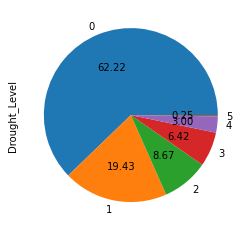

In [6]:
y.value_counts().plot.pie(autopct='%.2f')

In [7]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [8]:
train_X_norm=preprocessing.normalize(train_X)
test_X_norm=preprocessing.normalize(test_X)

In [9]:
M1=Model
#M1.fit(train_X_norm,train_Y)
M1.fit(train_X,train_Y)

RandomForestClassifier()

In [10]:
#M1_prediction=M1.predict(test_X_norm)
M1_prediction=M1.predict(test_X)

In [11]:
ACC_1=accuracy_score(test_Y,M1_prediction)
print("Accuracy Score: %.2f" % ACC_1)
print(classification_report(test_Y,M1_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.69
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       209
           1       0.31      0.11      0.16        46
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        16

   micro avg       0.69      0.69      0.69       300
   macro avg       0.26      0.27      0.25       300
weighted avg       0.54      0.69      0.60       300



C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Undersampling

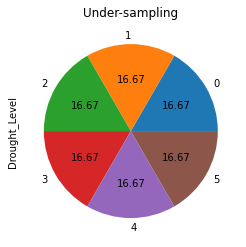

In [12]:
rus = RandomUnderSampler(sampling_strategy="not minority") # String
x_res, y_res = rus.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [13]:
y_res.value_counts()

0    3
1    3
2    3
3    3
4    3
5    3
Name: Drought_Level, dtype: int64

In [14]:
train_X_res,test_X_res,train_Y_res,test_Y_res=train_test_split(x_res,y_res,test_size=0.25,shuffle=False)

In [15]:
train_X_norm_res=preprocessing.normalize(train_X_res)
test_X_norm_res=preprocessing.normalize(test_X_res)

In [16]:
M2=Model
#M2.fit(train_X_norm_res,train_Y_res)
M2.fit(train_X_res,train_Y_res)

RandomForestClassifier()

In [17]:
#M2_prediction=M2.predict(test_X_norm)
M2_prediction=M2.predict(test_X)

In [18]:
ACC_2=accuracy_score(test_Y,M2_prediction)
print("Accuracy Score: %.2f" % ACC_2)
print(classification_report(test_Y,M2_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.23
              precision    recall  f1-score   support

           0       0.65      0.20      0.31       209
           1       0.19      0.28      0.23        46
           2       0.09      0.45      0.16        29
           3       0.04      0.06      0.05        16

   micro avg       0.23      0.23      0.23       300
   macro avg       0.24      0.25      0.18       300
weighted avg       0.49      0.23      0.27       300



# Random Oversampling

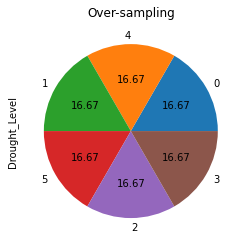

In [19]:
ros = RandomOverSampler(sampling_strategy="not majority")
x_ros, y_ros = ros.fit_resample(x, y)
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [20]:
y_ros.value_counts()

0    746
4    746
1    746
5    746
2    746
3    746
Name: Drought_Level, dtype: int64

In [21]:
train_X_ros,test_X_ros,train_Y_ros,test_Y_ros=train_test_split(x_ros,y_ros,test_size=0.25,shuffle=False)

In [22]:
train_X_norm_ros=preprocessing.normalize(train_X_ros)
test_X_norm_ros=preprocessing.normalize(test_X_ros)

In [23]:
M3=Model
#M3.fit(train_X_norm_ros,train_Y_ros)
M3.fit(train_X_ros,train_Y_ros)

RandomForestClassifier()

In [24]:
#M3_prediction=M3.predict(test_X_norm)
M3_prediction=M3.predict(test_X)

In [25]:
ACC_3=accuracy_score(test_Y,M3_prediction)
print("Accuracy Score: %.2f" % ACC_3)
print(classification_report(test_Y,M3_prediction,labels=np.unique(test_Y)))

Accuracy Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        16

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Synthetic Minority Oversampling Technique (SMOTE)

SMT = SMOTE()
x_smt, y_smt = SMT.fit_resample(x, y)
ax = y_smt.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

y_smt.value_counts()

train_X_smt,test_X_smt,train_Y_smt,test_Y_smt=train_test_split(x_smt,y_smt,test_size=0.25,shuffle=False)

train_X_norm_smt=preprocessing.normalize(train_X_smt)
test_X_norm_smt=preprocessing.normalize(test_X_smt)

M4=Model
#M4.fit(train_X_norm_smt,train_Y_smt)
M4.fit(train_X_smt,train_Y_smt)

#M4_prediction=M4.predict(test_X_norm)
M4_prediction=M4.predict(test_X)

ACC_4=accuracy_score(test_Y,M4_prediction)
print("Accuracy Score: %.2f" % ACC_4)
print(classification_report(test_Y,M4_prediction,labels=np.unique(test_Y)))

# Metrics

In [26]:
#summary = pd.DataFrame({'Type':['Original', 'Random Undersampling', 'Random Oversampling','SMOTE'],
                   #'Accuracy Score':[ACC_1, ACC_2, ACC_3, ACC_4]})
#summary
summary = pd.DataFrame({'Type':['Original', 'Random Undersampling', 'Random Oversampling'],
                   'Accuracy Score':[ACC_1, ACC_2, ACC_3]})
summary

,Type,Accuracy Score
0,Original,0.686667
1,Random Undersampling,0.230000
2,Random Oversampling,1.000000


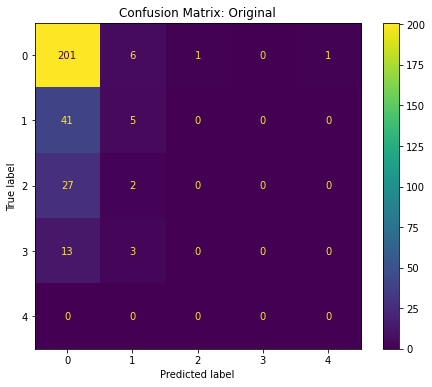

In [27]:
confusion_matrix = metrics.confusion_matrix(test_Y, M1_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Original')
cm_display.plot(ax=ax)
plt.show()

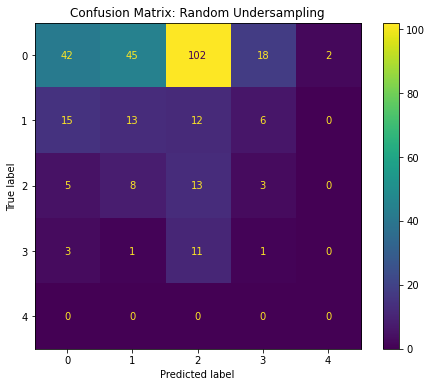

In [28]:
confusion_matrix = metrics.confusion_matrix(test_Y, M2_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Random Undersampling')
cm_display.plot(ax=ax)
plt.show()

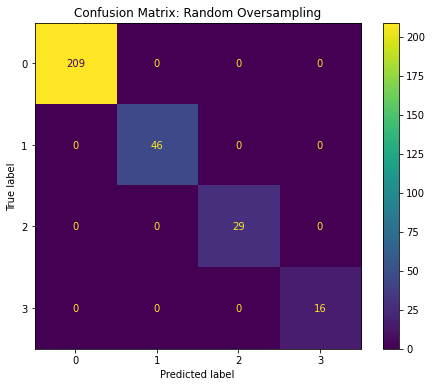

In [29]:
confusion_matrix = metrics.confusion_matrix(test_Y, M3_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Random Oversampling')
cm_display.plot(ax=ax)
plt.show()

confusion_matrix = metrics.confusion_matrix(test_Y, M4_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: SMOTE')
cm_display.plot(ax=ax)
plt.show()